<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/WDBC-Dataset/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Import necessary libraries
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("parulpandey/covid19-clinical-trials-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/parulpandey/covid19-clinical-trials-dataset/versions/10


In [82]:
# Load the dataset
file_path = os.path.join(path, "COVID clinical trials.csv")
df = pd.read_csv(file_path)

# Preview the dataset
print("Initial Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Initial Dataset Overview:
   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                   

In [83]:
# Select relevant columns and handle missing values
columns_to_keep = ['Status', 'Study Type', 'Conditions', 'Locations', 'Enrollment']
df_cleaned = df[columns_to_keep].dropna()

# Convert 'Enrollment' column to numeric for analysis
df_cleaned['Enrollment'] = pd.to_numeric(df_cleaned['Enrollment'], errors='coerce')

# Extract the country information from the 'Locations' column
df_cleaned['Country'] = df_cleaned['Locations'].apply(lambda x: x.split(',')[-1].strip())

# Check for cleaned dataset overview
print("\nCleaned Dataset Overview:")
print(df_cleaned.head())
print("\nCleaned Dataset Info:")
print(df_cleaned.info())



Cleaned Dataset Overview:
                   Status      Study Type  \
0  Active, not recruiting  Interventional   
1      Not yet recruiting  Interventional   
2              Recruiting   Observational   
3  Active, not recruiting   Observational   
4              Recruiting   Observational   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Infection   
2                                            covid19   
3                                              COVID   
4  Maternal Fetal Infection Transmission|COVID-19...   

                                           Locations  Enrollment     Country  
0  Groupe Hospitalier Paris Saint-Joseph, Paris, ...      1000.0      France  
1       Cimedical, Barranquilla, Atlantico, Colombia        60.0    Colombia  
2  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...       500.0  San Marino  
3  Hong Kong Sanatorium & Hospital, Hong Kong, Ho

In [84]:
# Save the cleaned dataset for future use (optional)
df_cleaned.to_csv("Cleaned_COVID_Clinical_Trials.csv", index=False)


<ipython-input-85-3b4e6fd32f2f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts[:10].values, y=country_counts[:10].index, palette='pastel')


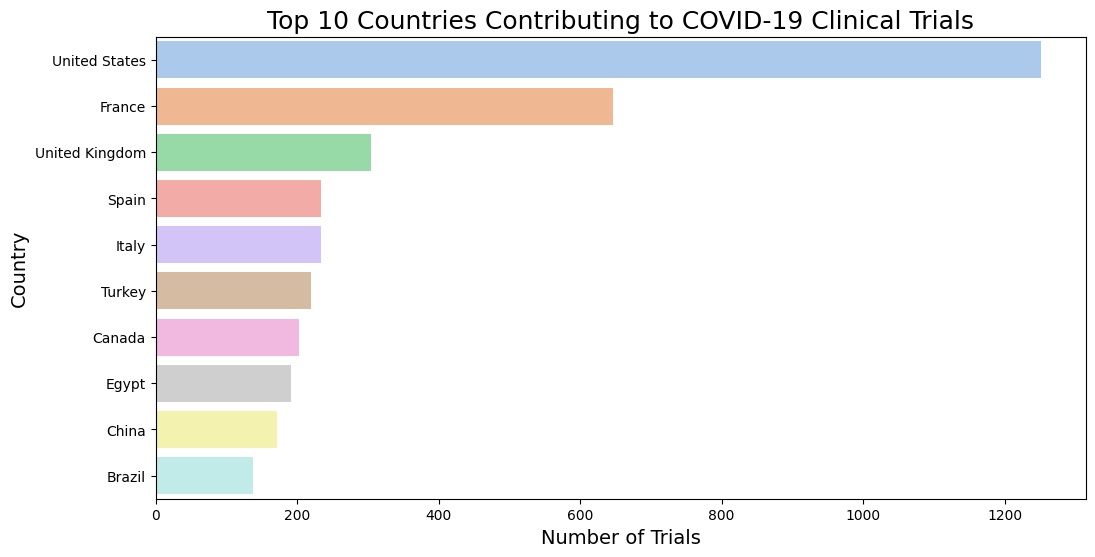

In [85]:
# Calculate trial counts by country
country_counts = df_cleaned['Country'].value_counts()

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts[:10].values, y=country_counts[:10].index, palette='pastel')
plt.title('Top 10 Countries Contributing to COVID-19 Clinical Trials', fontsize=18)
plt.xlabel('Number of Trials', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()


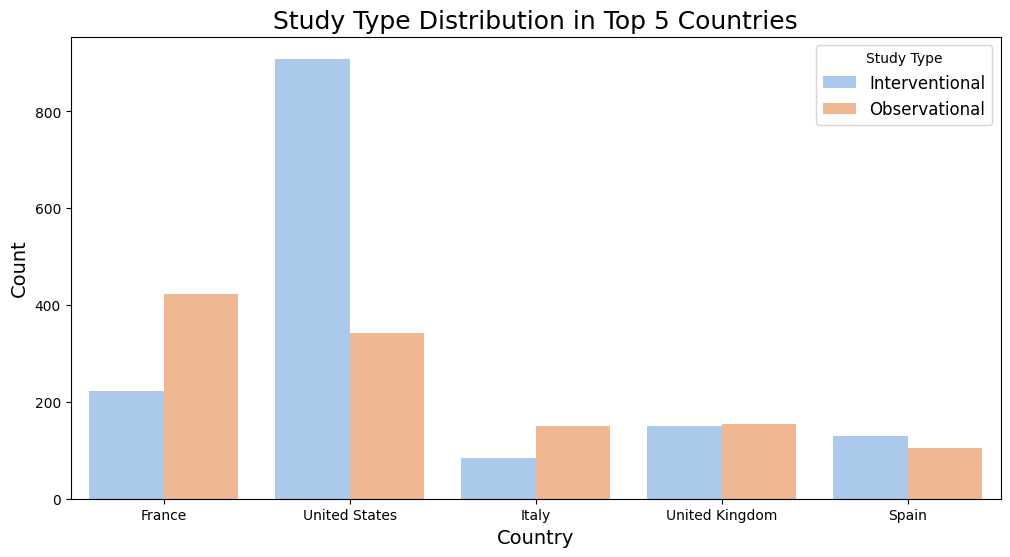

In [86]:
# Filter for top 5 countries
top_countries = country_counts[:5].index
top_country_data = df_cleaned[df_cleaned['Country'].isin(top_countries)]

# Plot study type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=top_country_data, x='Country', hue='Study Type', palette='pastel')
plt.title('Study Type Distribution in Top 5 Countries', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Study Type', fontsize=12)
plt.show()


<ipython-input-11-bdd40b1196b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_enrollment.values, y=median_enrollment.index, palette='pastel')


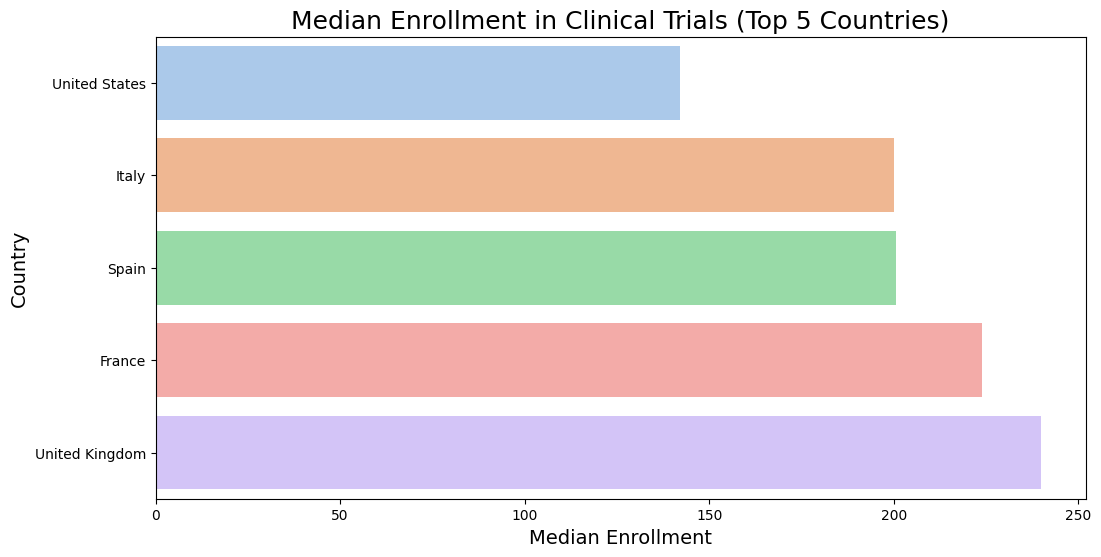

In [11]:
# Calculate median enrollment by country
median_enrollment = top_country_data.groupby('Country')['Enrollment'].median().sort_values()

# Plot median enrollment distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=median_enrollment.values, y=median_enrollment.index, palette='pastel')
plt.title('Median Enrollment in Clinical Trials (Top 5 Countries)', fontsize=18)
plt.xlabel('Median Enrollment', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()
